In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Dark2.colors)
import bruteForce2D
import bruteForce3D
import ewaldDipoles
import ewaldDipoles2D
import math

In [2]:
#Defining the atomic system

alattice = 1 # Defines the lattice spacing of the cell
a = np.array ([1,0,0])*alattice
b = np.array ([0,1,0])*alattice
c = np.array ([0,0,1])*alattice

ns = 2
tau = np.zeros([3,ns], dtype = 'float')
tau[:,0] = [0,0,0] # Indicates the coordinates of the (Cs) in the cell/lattice
tau[:,1] = [1./2.,1./2.,1./2.] # Indicates the coordinates of the (Cl) in the cell/lattice
spins = np.zeros([3, ns], dtype='float')
sNorm = 1
spins[:,0] = [0,0,1.0] # Indicates the spin orientation of the (Cs) in the cell/lattice
spins[:,1] = [0,0,-1.0] # Indicates the spin orientation of the (Cl) in the cell/lattice

In [3]:
bruteForce3D.sumDipoles(a, b, c, tau, spins, 10, parallel=False)

[0.  0.5]
Sum of the cell: 3.4186003313485587e-16
Sum each atom with rest: 1.057349562278668e-15


1.5014387721287305e-15

In [4]:
ewDip = ewaldDipoles.ewald(a, b, c, tau, spins, 2, 10, 10, parallel=False)
print(ewDip) 
np.sum(ewDip)

Sum of the cell: 0.18279250145088474
Sum each atom with rest: 0.0831688843420976
(1.344746415839334e-07, 7.148422614446278e-41, 0.2659613857929792, -0.2659615202676218)


-1.0547118733938987e-15

## 2D magnetic systems

In [5]:
#Defining the atomic system

aSites = 1.0 #Length between two sites in the unit cell

a = np.array ([2.0*np.cos(math.pi/6.0), 0, 0])
b = np.array ([-np.cos(math.pi/6.0), (1.0 + np.sin(math.pi/6.0)), 0])
c = np.array ([0,0,1000]) #Large distance approximate the case where the 2D material is alone

ns = 2
tau = np.zeros([3,ns], dtype = 'float')
tau[:,0] = [0,0,0]
tau[:,1] = 2./3.*a+1./3.*b
spins = np.zeros([3, ns], dtype='float')
sNorm = 1
spins[:,0] = [0,0,1.0]
spins[:,1] = [0,0,-1.0]

In [6]:
#Compute norm to verify that the distance is normalized to the lattice spacing
np.linalg.norm((2./3.)*a + (1./3.)*b)

0.9999999999999999

In [7]:
2.491*bruteForce2D.sumDipoles(a, b, tau, spins, 10, parallel=False)/aSites**3

Sum of the cell: -1.0000000000000004
Sum each atom with rest: -1.331409374824557


-5.807540752687958

In [8]:
2.491*bruteForce3D.sumDipoles(a, b, c, tau, spins, 10, parallel=False)/aSites**3

[0.        0.8660254]
Sum of the cell: -1.0000000000000004
Sum each atom with rest: -1.3314093748300595


-5.807540752701566

In [9]:
ewDip = ewaldDipoles.ewald(a, b, c, tau, spins, 3, 20, 20, parallel=False)
print(ewDip)
2.491*np.sum(ewDip)/aSites**3

Sum of the cell: -0.6822703303362129
Sum each atom with rest: -1.1651944480178065
(1.6149985468917953e-06, -1.458074571962344e-23, -1.8474647783540192, -0.48860251190291987)


-5.819139597068656

In [10]:
ewDip = ewaldDipoles2D.ewald(a, b, c, tau, spins, 3, 20, 20, parallel=False)
print(ewDip)
2.491*np.sum(ewDip)/aSites**3

Sum of the cell: -1.3645406606724257
Sum each atom with rest: -2.330388896035613
(0.0, 0.0, -1.8474647783540192, -0.48860251190291987)


-5.819143620030036

### Convergence test

In [11]:
#Produce plot of real sum vs hmaxT
maxT = np.linspace(1, 20, 20, dtype=int)
brute2D = []
for i in range(len(maxT)):
    brute2D.append(2.491*bruteForce2D.sumDipoles(a, b, tau, spins, maxT[i])/aSites**3)

In [12]:
#Produce plot of real sum vs hmaxT
maxT = np.linspace(1, 20, 20, dtype=int)
ewald2D = []
for i in range(len(maxT)):
    ewald2D.append(2.491*np.sum(ewaldDipoles2D.ewald(a, b, c, tau, spins, 2, 5, maxT[i]))/aSites**3)

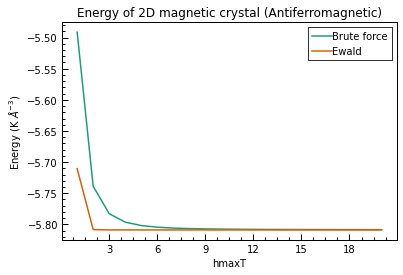

In [20]:
fig = plt.figure()
ax = fig.gca()
ax.set_title('Energy of 2D magnetic crystal (Antiferromagnetic)')
ax.set_xlabel('hmaxT')
ax.set_ylabel('Energy (K $\AA^{-3}$)')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.set_yscale('log')
ax.plot(maxT, brute2D, label='Brute force')
ax.plot(maxT, ewald2D, label='Ewald')
ax.legend()
fig.savefig('Plots/bruteEwald2D.png')

In [14]:
#Produce plot of real sum vs hmaxT
maxT = np.linspace(1, 20, 20, dtype=int)
brute3D = []
for i in range(len(maxT)):
    brute3D.append(2.491*bruteForce3D.sumDipoles(a, b, c, tau, spins, maxT[i])/aSites**3)

In [15]:
#Produce plot of real sum vs hmaxT
maxT = np.linspace(1, 20, 20, dtype=int)
ewald3D = []
for i in range(len(maxT)):
    ewald3D.append(2.491*np.sum(ewaldDipoles.ewald(a, b, c, tau, spins, 2, 5, maxT[i]))/aSites**3)

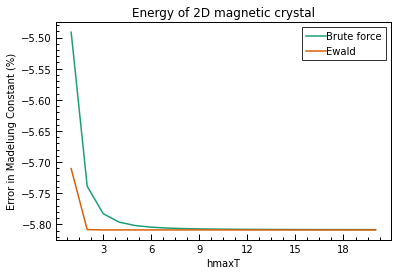

In [16]:
fig = plt.figure()
ax = fig.gca()
ax.set_title('Energy of 2D magnetic crystal')
ax.set_xlabel('hmaxT')
ax.set_ylabel('Error in Madelung Constant (%)')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.set_yscale('log')
ax.plot(maxT, brute3D, label='Brute force')
ax.plot(maxT, ewald3D, label='Ewald')
ax.legend()
#fig.savefig('Plots/brute2D.png')

### Antiferromagnetic case

In [25]:
spins[:,0] = [0,0,1.0]
spins[:,1] = [0,0,1.0]

In [26]:
#Produce plot of real sum vs hmaxT
maxT = np.linspace(1, 20, 20, dtype=int)
brute2DFerro = []
for i in range(len(maxT)):
    brute2DFerro.append(2.491*bruteForce2D.sumDipoles(a, b, tau, spins, maxT[i])/aSites**3)

In [27]:
#Produce plot of real sum vs hmaxT
maxT = np.linspace(1, 20, 20, dtype=int)
ewald2DFerro = []
for i in range(len(maxT)):
    ewald2DFerro.append(2.491*np.sum(ewaldDipoles2D.ewald(a, b, c, tau, spins, 2, 5, maxT[i]))/aSites**3)

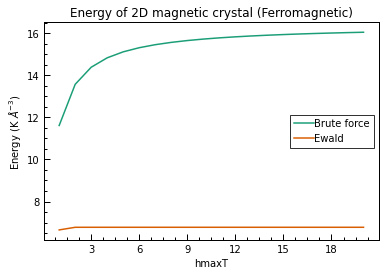

In [28]:
fig = plt.figure()
ax = fig.gca()
ax.set_title('Energy of 2D magnetic crystal (Ferromagnetic)')
ax.set_xlabel('hmaxT')
ax.set_ylabel('Energy (K $\AA^{-3}$)')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.set_yscale('log')
ax.plot(maxT, brute2DFerro, label='Brute force')
ax.plot(maxT, ewald2DFerro, label='Ewald')
ax.legend()
fig.savefig('Plots/bruteEwald2DFerro.png')